# Steam: ¿calidad igual a popularidad?

Autor: Hernán Langer  
Curso: Data Science I - Coderhouse  
Comisión: 84650

## Abstract

El presente proyecto se centra en el análisis de un dataset de videojuegos de la plataforma Steam, correspondiente al año 2022. El conjunto de datos incluye información sobre cada título, entre ellas: identificador, nombre, fecha de lanzamiento, número máximo de jugadores simultáneos, reseñas positivas, reseñas negativas, total de reseñas, calificación otorgada, género principal, géneros asociados, distribuidor, desarrollador y fechas de hitos relevantes. Este dataset contempla videojuegos que cuentan con al menos 50 reseñas, lo que asegura un grado mínimo de visibilidad dentro de la plataforma.

La elección de este dataset se fundamenta en la importancia creciente de la industria de los videojuegos como fenómeno cultural, social y económico. Steam constituye el ecosistema de distribución digital más influyente en este mercado, y sus métricas ofrecen un insumo valioso para comprender el vínculo entre la percepción de calidad (a partir de las reseñas y ratings) y la popularidad alcanzada (medida por picos de jugadores y volumen de reseñas).

El análisis busca responder a la pregunta central: ¿la calidad de un videojuego, medida por la valoración de los usuarios, garantiza su popularidad en la plataforma Steam?. Además, se pretende indagar en qué medida los géneros y las distribuidoras inciden en los niveles de aceptación y éxito.

En esta primera entrega se plantean preguntas de investigación que guiarán el análisis exploratorio, junto con un diagnóstico inicial del dataset y visualizaciones preliminares que permitan establecer patrones y tendencias. Estos hallazgos iniciales sentarán las bases para un estudio más profundo en las próximas etapas del proyecto.

## Preguntas de Análisis

¿Existe correlación entre el rating y el número máximo de jugadores alcanzados por un videojuego?

¿Los géneros más populares en 2022 son también los mejor valorados por los usuarios?

¿Los juegos con un mayor volumen de reseñas totales tienden a tener mejores o peores promedios de calificación?

# Librerías a utilizar

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Set a utilizar

In [98]:
url = "https://raw.githubusercontent.com/HernanLanger/CODERHOUSE_DataScience_I/main/Steam_%20%C2%BFcalidad%20igual%20a%20popularidad_%20-%20Data%20Set%201%20-%20Data%20Set%201.csv"

df = pd.read_csv(
    url,
    dtype={"peak_players": str, "total_reviews": str, "positive_reviews": str, "negative_reviews": str, "rating": str},
    low_memory=False
)

df.head()

,id,game,link,release,peak_players,positive_reviews,negative_reviews,total_reviews,rating,primary_genre,store_genres,publisher,developer,store_asset_mod_time,all_time_peak_date
0,66279,Counter-Strike: Global Offensive,/app/730/,21/08/2012,1.519.457,6.307.931,809.845,7.117.776,"88,29",Free to Play (37),"Action (1), Free to Play (37)",Valve,Valve,8/05/2023,6/05/2023
1,55634,PUBG: BATTLEGROUNDS,/app/578080/,21/12/2017,3.257.248,1.235.880,927.317,2.163.197,"57,04",Free to Play (37),"Action (1), Adventure (25), Free to Play (37),...",KRAFTON Inc.,KRAFTON Inc.,10/04/2023,13/01/2018
2,65999,Dota 2,/app/570/,9/07/2013,1.295.114,1.618.770,341.275,1.960.045,"82,17",Free to Play (37),"Action (1), Free to Play (37), Strategy (2)",Valve,Valve,27/04/2023,6/03/2016
3,61939,Grand Theft Auto V,/app/271590/,13/04/2015,364.548,1.319.655,219.551,1.539.206,"85,25",Action (1),"Action (1), Adventure (25)",Rockstar Games,Rockstar North,19/12/2022,19/04/2015
4,61916,Tom Clancy's Rainbow Six Siege,/app/359550/,1/12/2015,201.053,975.285,153.441,1.128.726,"85,86",Action (1),Action (1),Ubisoft,Ubisoft Montreal,12/05/2023,20/03/2021


# Transformaciones al Data Set

In [99]:
# Transformar columanas a String para luego convertir en numeros enteros
num_int_cols = ["total_reviews", "positive_reviews", "negative_reviews", "peak_players"]

for col in num_int_cols:
    df[col] = df[col].str.replace(".", "", regex=False)  # quitar puntos de miles
    df[col] = df[col].str.replace(",", ".", regex=False)  # reemplazar coma decimal por punto
    df[col] = df[col].str.strip()
    df[col] = pd.to_numeric(df[col], errors="coerce").astype("Int64")  # enteros con NaN


In [100]:
# Convertir columna "rating" en float
df["rating"] = df["rating"].str.replace(",", ".", regex=False).str.strip()
df['rating'] = df['rating'].astype(float)

In [101]:
# Configurando el Tipo de dato de la columna "release" a DateTime
df["release"] = pd.to_datetime(df["release"],dayfirst=True, errors="coerce")

# Filtrar: juegos publicados en el año 2022 y con más de 50 reseñas
df_2022 = df.loc[
    (df["release"].dt.year == 2022) & (df["total_reviews"] > 50)
].copy()

# Verifición de tamaño y primeras filas
print("Cantidad de registros:", df_2022.shape[0])
df_2022.head()

Cantidad de registros: 3217


,id,game,link,release,peak_players,positive_reviews,negative_reviews,total_reviews,rating,primary_genre,store_genres,publisher,developer,store_asset_mod_time,all_time_peak_date
10,3607,ELDEN RING,/app/1245620/,2022-02-24,953426,609072,54122,663194,91.10,Action (1),"Action (1), RPG (3)",FromSoftware Inc.,FromSoftware Inc.,20/01/2023,5/03/2022
31,11893,Call of Duty®: Modern Warfare® II | Warzone™ 2.0,/app/1938090/,2022-10-28,491670,216172,133831,350003,61.51,Action (1),Action (1),Activision,Infinity Ward,12/04/2023,20/11/2022
39,3538,Raft,/app/648800/,2022-06-20,101096,246467,16558,263025,92.68,Adventure (25),"Adventure (25), Indie (23), Simulation (28)",Axolot Games,Redbeet Interactive,17/06/2022,26/06/2022
55,3936,Mount & Blade II: Bannerlord,/app/261550/,2022-10-25,248216,192573,26841,219414,86.84,Action (1),"Action (1), Indie (23), RPG (3), Simulation (2...",TaleWorlds Entertainment,TaleWorlds Entertainment,25/10/2022,4/04/2020
64,8202,Lost Ark,/app/1599340/,2022-02-11,1325305,137424,53849,191273,71.29,Free to Play (37),"Action (1), Adventure (25), Free to Play (37),...",Amazon Games,Smilegate RPG,7/03/2023,12/02/2022


# Verificación de valores nulos

In [102]:
# Conteo de valores nulos por columna
nulos_count = df_2022.isnull().sum()
print("Cantidad de valores nulos por columna:\n")
print(nulos_count)

# Porcentaje de valores nulos por columna
nulos_pct = df_2022.isnull().mean()
print("\nPorcentaje de valores nulos por columna:\n")
print(nulos_pct)


Cantidad de valores nulos por columna:

id                      0
game                    0
link                    0
release                 0
peak_players            0
positive_reviews        0
negative_reviews        0
total_reviews           0
rating                  0
primary_genre           0
store_genres            0
publisher               5
developer               2
store_asset_mod_time    0
all_time_peak_date      0
dtype: int64

Porcentaje de valores nulos por columna:

id                      0.000000
game                    0.000000
link                    0.000000
release                 0.000000
peak_players            0.000000
positive_reviews        0.000000
negative_reviews        0.000000
total_reviews           0.000000
rating                  0.000000
primary_genre           0.000000
store_genres            0.000000
publisher               0.001554
developer               0.000622
store_asset_mod_time    0.000000
all_time_peak_date      0.000000
dtype: float64


# Pregunta 1: Máximo de jugadores vs Rating

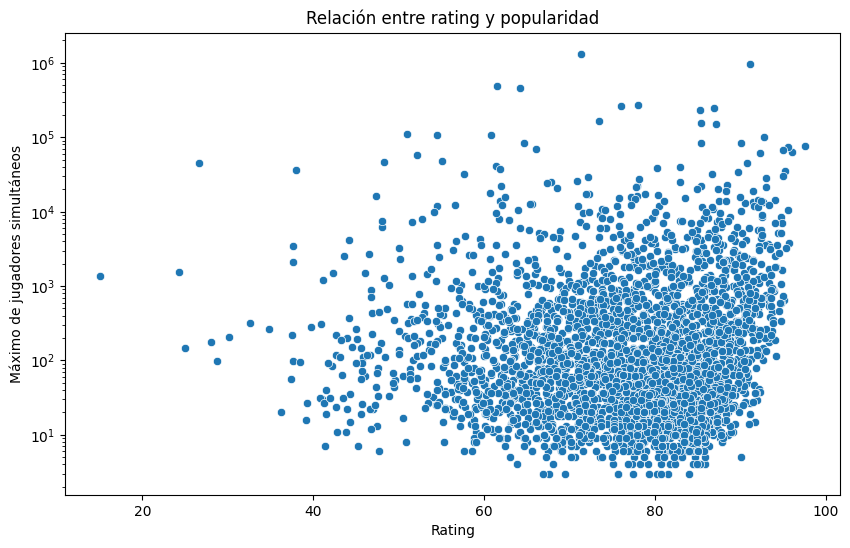

Correlación entre rating y peak_players: 0.00


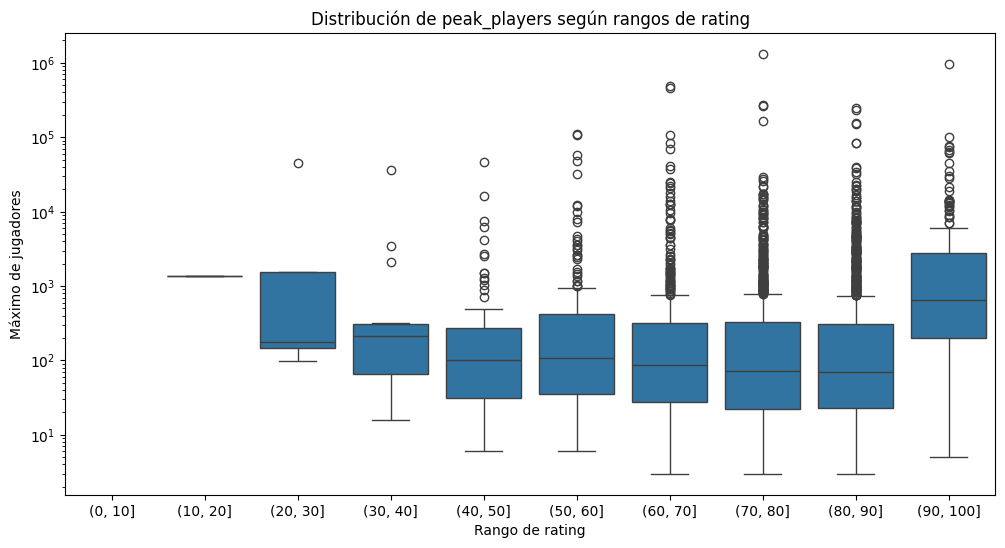

In [103]:
# Scatter plot: rating vs peak_players
plt.figure(figsize=(10,6))
sns.scatterplot(x="rating", y="peak_players", data=df_2022)
plt.xlabel("Rating")
plt.ylabel("Máximo de jugadores simultáneos")
plt.title("Relación entre rating y popularidad")
plt.yscale("log")  # opcional si los valores de peak_players son muy grandes
plt.show()

# Correlación numérica
correlacion_rating = df_2022["rating"].corr(df_2022["peak_players"])
print(f"Correlación entre rating y peak_players: {correlacion_rating:.2f}")

# Boxplot por rangos de rating
# Distribución de los jugadores según rangos de rating:

df_2022["rating_group"] = pd.cut(df_2022["rating"], bins=range(0, 101, 10))  # 0-10, 10-20, ...
plt.figure(figsize=(12,6))
sns.boxplot(x="rating_group", y="peak_players", data=df_2022)
plt.yscale("log")
plt.xlabel("Rango de rating")
plt.ylabel("Máximo de jugadores")
plt.title("Distribución de peak_players según rangos de rating")
plt.show()

## Interpretación pregunta 1:

El scatter plot muestra los puntos de peak_players vs rating.

La gran mayoría de los juegos está concentrada en la parte baja del eje Y (pocos jugadores), incluso cuando el rating es alto.

La correlación calculada es cercana a 0, lo que indica que no hay una relación lineal clara entre rating y número máximo de jugadores.

En otras palabras: tener un rating alto no garantiza que un juego tenga muchos jugadores simultáneos; puede haber juegos muy populares con rating medio y juegos con rating alto que no llegan a muchos jugadores.

# Pregunta 2: Géneros populares vs Rating

                 primary_genre  total_reviews_genre     rating
0                   Action (1)              2956982  75.413584
1               Adventure (25)              1125883  78.906352
4            Free to Play (37)               634612  71.439368
5                   Indie (23)               587901  77.187351
9              Simulation (28)               502633  75.194082
11                Strategy (2)               309766  73.848093
7                      RPG (3)               244869  76.112115
10                 Sports (18)               136172  73.424865
2                   Casual (4)               107825  78.458210
8                   Racing (9)                73380  73.574600
3            Early Access (70)                57904  77.091667
6   Massively Multiplayer (29)                50376  61.391154
12           Unknown Genre (0)                  377  79.245000


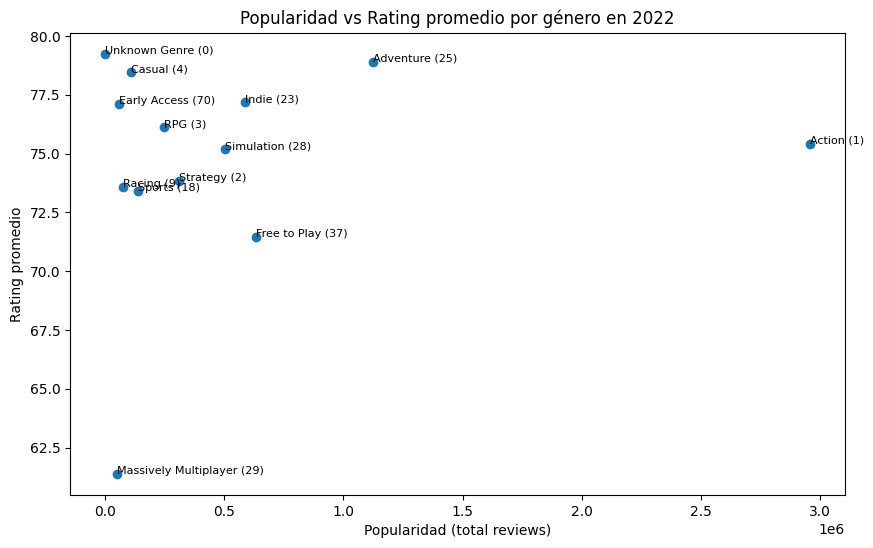

Correlación entre popularidad y rating: 0.14


In [104]:
# Popularidad por género (sumando total_reviews)
popularidad = df_2022.groupby('primary_genre')['total_reviews'].sum().reset_index()
popularidad.columns = ['primary_genre', 'total_reviews_genre']

#Rating promedio por género
rating_promedio = df_2022.groupby('primary_genre')['rating'].mean().reset_index()

# Combinar ambos
generos_2022 = pd.merge(popularidad, rating_promedio, on='primary_genre')

# Ordenar por popularidad
generos_2022 = generos_2022.sort_values(by='total_reviews_genre', ascending=False)

print(generos_2022)
plt.figure(figsize=(10,6))
plt.scatter(generos_2022['total_reviews_genre'], generos_2022['rating'])
plt.xlabel('Popularidad (total reviews)')
plt.ylabel('Rating promedio')
plt.title('Popularidad vs Rating promedio por género en 2022')


#Añadir etiquetas de género
for i, row in generos_2022.iterrows():
    plt.text(row['total_reviews_genre'], row['rating'], row['primary_genre'], fontsize=8)

plt.show()

#Correlación
correlacion = generos_2022['total_reviews_genre'].corr(generos_2022['rating'])
print(f'Correlación entre popularidad y rating: {correlacion:.2f}')

## Interpretación pregunta 2:

Distribución general:

La mayoría de los géneros se agrupa en la franja de rating entre ~70 y 80, mostrando que incluso los géneros menos populares mantienen valoraciones relativamente buenas.

Hay unos pocos géneros extremadamente populares (Action, Adventure), que se destacan mucho en el eje X, mientras que otros como Massively Multiplayer o Free to Play están en el extremo inferior de popularidad relativa.

Correlación:

En el gráfico se indica una correlación de 0.14, lo que significa que hay una relación muy débil y positiva entre popularidad y rating.

En conclusión, los géneros más populares en 2022 no coinciden necesariamente con los mejor valorados. Hay géneros menos populares con calificaciones tan buenas o mejores que los líderes en popularidad.


# Pregunta 3: Reviews totales vs Rating

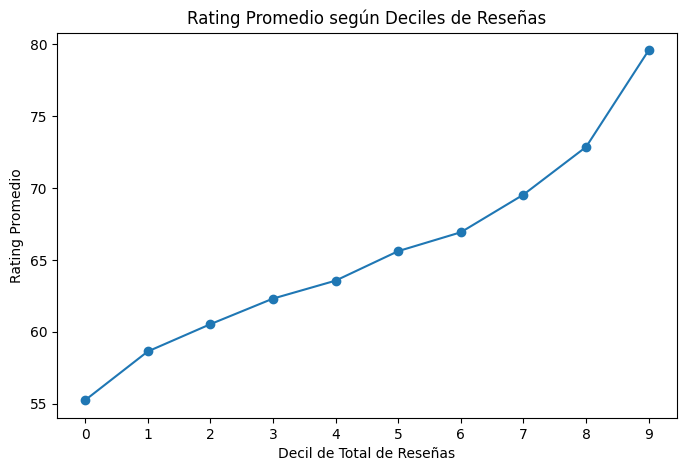

In [105]:
# Crear deciles según total_reviews
df['decile'] = pd.qcut(df['total_reviews'], 10, labels=False)

# Calcular promedio de rating por decil
rating_promedio = df.groupby('decile')['rating'].mean()

# Gráfico de línea
plt.figure(figsize=(8,5))
plt.plot(rating_promedio.index, rating_promedio.values, marker='o')
plt.xlabel('Decil de Total de Reseñas')
plt.ylabel('Rating Promedio')
plt.title('Rating Promedio según Deciles de Reseñas')
plt.xticks(range(10))
plt.show()

## Interpretación pregunta 3:

Este gráfico muestra el rating promedio según deciles de total de reseñas.

Hay una tendencia ascendente: a medida que aumenta el número de reseñas (de decil 0 a decil 9), el rating promedio también aumenta.

Esto indica que los juegos con más reseñas tienden a tener mejores calificaciones promedio.

La curva es relativamente suave, lo que sugiere que no hay saltos bruscos; la relación es consistente entre deciles.

Los juegos con pocas reseñas tienen ratings promedio más bajos y más variables, esto suele pasar porque con pocas opiniones el promedio puede ser más sensible a calificaciones negativas.
